In [21]:
%load_ext autoreload
%autoreload 2

from ff_energy.cli import load_config_maker, load_all_theory, charmm_jobs
# from ff_energy.structure import
from ff_energy.potential import FF, LJ
import numpy as np
from ff_energy.data import Data, plot_ecol, plot_intE
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import pandas as pd 
from ff_energy.utils import *
from ff_energy.data import Data

sig_bound = (0.5, 4.0)
ep_bound = (0.00001, 1.0)
LJ_bound = [(sig_bound), (sig_bound), (ep_bound), (ep_bound)]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


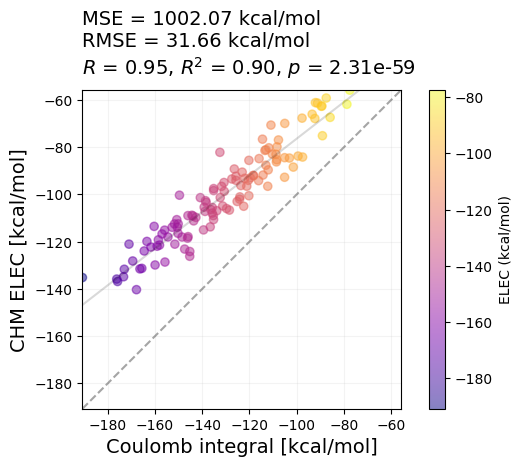

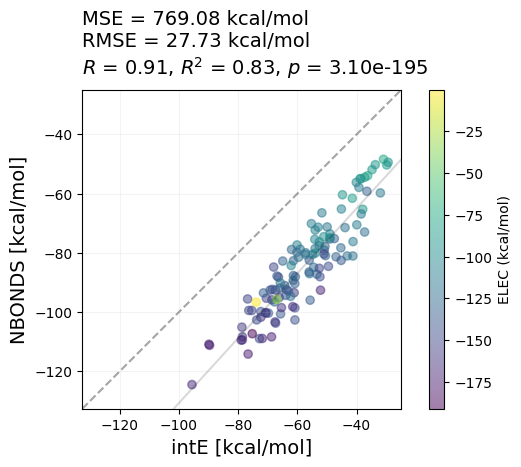

In [22]:
data_ = Data("pickles/water_cluster/pbe0_dz.mdcm")
data_.plot_ecol()
data_.plot_intE()

In [19]:
pk = "pickles/water_cluster/pbe0_dz.pc"
data_ = Data(pk)
data_.data
data_.plot_ecol()
data_.plot_intE()

,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,C_ENERGY,intE,NBONDS,nb_intE
test467,-113.436686,test467,21.55483,-53.42358,14.82881,test467,-1527.154217,test467,-1527.236629,-51.714066,-38.59477,-38.59477
test471,-127.463435,test471,22.27065,-61.37597,14.54395,test471,-1527.144137,test471,-1527.242885,-61.964509,-46.83202,-46.83202
test117,-87.465907,test117,24.19257,-38.84255,8.80992,test117,-1527.145615,test117,-1527.193103,-29.798988,-30.03263,-30.03263
test96,-163.434955,test96,25.18816,-78.76038,18.10955,test96,-1527.131558,test96,-1527.246828,-72.332202,-60.65083,-60.65083
test186,-155.938399,test186,22.60152,-75.61214,22.50911,test186,-1527.145607,test186,-1527.253079,-67.438908,-53.10303,-53.10303
...,...,...,...,...,...,...,...,...,...,...,...,...
test48,NaN,NaN,22.08270,-72.69812,20.01366,test48,-1527.147549,test48,-1527.250885,-64.843945,-52.68446,-52.68446
test381,NaN,NaN,23.41589,-68.49908,19.67678,test381,-1527.147167,test381,-1527.236541,-56.082083,-48.82230,-48.82230
test489,NaN,NaN,20.91705,-90.73360,32.25939,test489,-1527.152482,test489,-1527.269339,-73.327986,-58.47421,-58.47421
test304,NaN,NaN,21.68895,-69.20978,17.28253,test304,-1527.150985,test304,-1527.239633,-55.626955,-51.92725,-51.92725


In [40]:
pk = "pickles/water_dimer/pbe0_dz.pc"
data_ = Data(pk)
data_.data
# data_.plot_ecol()
# data_.plot_intE()

,TOTAL,ELEC,VDW,KEY,M_ENERGY,C_ENERGY,intE,NBONDS,nb_intE
8-5,None,None,None,8-5,-152.714146,-152.079453,398.271831,NaN,NaN
11-1,None,None,None,11-1,-152.714178,-152.078193,399.082709,NaN,NaN
20-2,None,None,None,20-2,-152.714157,-152.075904,400.505497,NaN,NaN
10-1,None,None,None,10-1,-152.714178,-152.078847,398.672378,NaN,NaN
1-3,None,None,None,1-3,-152.714157,-151.699480,636.712937,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9-5,None,None,None,9-5,-152.714175,-152.078697,398.764163,NaN,NaN
13-4,None,None,None,13-4,-152.714172,-152.076306,400.263193,NaN,NaN
8-1,None,None,None,8-1,-152.714178,-152.080659,397.535199,NaN,NaN
22-1,None,None,None,22-1,-152.714178,-152.075932,400.501324,NaN,NaN


In [39]:
data_.data[data_.data["KEY"] == "1-2"]

,TOTAL,ELEC,VDW,KEY,M_ENERGY,C_ENERGY,intE,NBONDS,nb_intE
1-2,None,None,None,1-2,-152.714169,-151.711489,629.184601,NaN,NaN
